# Does `criterion=gini/entropy` make any difference in Decision Tree ?
Gini or Entropy references:
1. ref 1: https://datascience.stackexchange.com/questions/10228/when-should-i-use-gini-impurity-as-opposed-to-information-gain
2. ref 2: https://www.quora.com/What-is-difference-between-Gini-Impurity-and-Entropy-in-Decision-Tree

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

Method: 
* Generate random datasets, with:
    1. n_f: feature number between 5 to 20
    2. n_i: informative 1 to n_f
    3. n_r: n_redundant 0 to (n_f - n_i)
    4. n_c: n classes between 1 to n_i

* Run classifiers with criterion 'gini' and 'entropy' respectively, return accuracy score

* Draw accuracy score graph

In [60]:
import random
def generate_data():
    '''Random choose:
    1. n_f: feature number between 5 to 20
    2. n_i: informative 1 to n_f
    3. n_r: n_redundant 0 to (n_f - n_i)
    4. n_c: n classes between 1 to 10
    '''
    n_f = random.randint(5, 20)
    n_i = random.randint(1, n_f - 1)
    n_r = random.randint(1, max(n_f - n_i, 2))
    n_c = random.randint(1, n_i)
    if n_i + n_r + n_c > n_f:
        n_f += 1
    
    X, y = make_classification(n_samples=1000, n_features=n_f, n_informative=n_i,
                               n_redundant=n_r, n_classes=n_c,
                               n_clusters_per_class=1, random_state=0)
    return X, y


def expe_accuracy():
    ''' Generate random dataset with classification, test with 'gini' & 'entropy', 
    return accruacy score
    '''
    X, y = generate_data()
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)
    
    # tree max_depth
    max_depth = random.randint(1, 30)

    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='gini')
    clf.fit(X_train, y_train)

    y_preds = clf.predict(X_val)
    acc_gini = accuracy_score(y_val, y_preds)
    #print(f"Gini accuracy score", acc_gini)

    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    clf.fit(X_train, y_train)

    y_preds = clf.predict(X_val)
    acc_entropy = accuracy_score(y_val, y_preds)
    #print(f"Entropy accuracy score", acc_entropy)

    return acc_gini, acc_entropy

expe_accuracy()

(0.725, 0.71)

In [61]:
gini = []
entropy = []
for i in range(100):
    ans = expe_accuracy()
    gini.append(ans[0])
    entropy.append(ans[1])
    

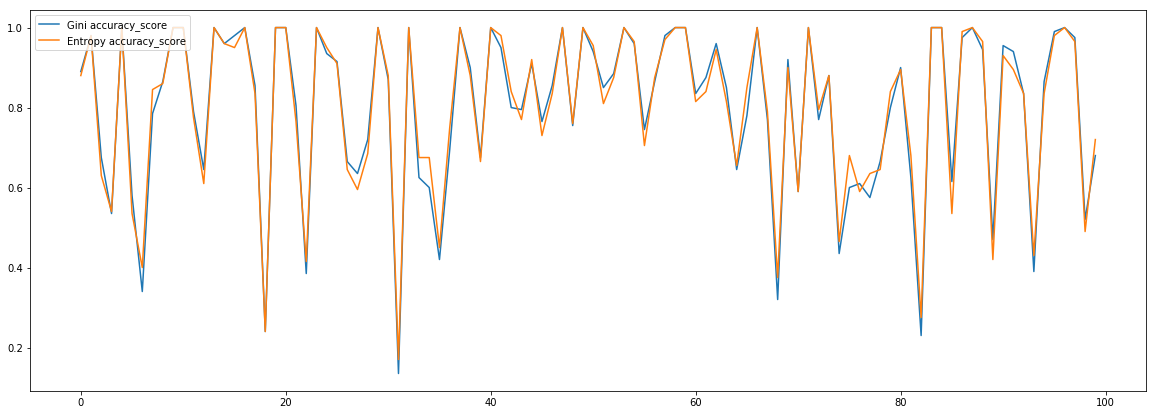

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.plot(range(0, len(gini)), gini, label = "Gini accuracy_score") 
plt.plot(range(0, len(gini)), entropy, label = "Entropy accuracy_score") 
plt.legend(loc="upper left")
plt.show()